In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install textblob

In [4]:
pip install bioinfokit

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pylab
from IPython.display import display
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set()  
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
import matplotlib.pyplot as plot
import numpy as np
%matplotlib inline
import os
import pandas
from scipy.stats import chi2_contingency
from numpy.random import rand
from numpy.random import seed
from scipy.stats import spearmanr
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from collections import Counter
nltk.download('punkt')
from nltk.util import ngrams
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.collocations import *
import re 
from scipy import stats
from scipy.stats import chi2_contingency 
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from scipy.stats import chi2
from bioinfokit.analys import stat
from numpy.random import rand
from numpy.random import seed
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency 

[nltk_data] Downloading package punkt to C:\Users\Nick
[nltk_data]     Molliconi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
RN = pd.read_csv('data_2_4_v1.csv')

In [7]:
RN.rename(columns={'What is your age group as of today?  ':'AgeGroup'},inplace=True)
RN.rename(columns={'Are you planning to leave the nursing profession entirely within the next six months?':'LeavingJobIN6MOS'},inplace=True)

In [8]:
RNAGE5 = RN.filter(['LeavingJobIN6MOS','AgeGroup'], axis=1)

In [9]:
RNAGE5=RNAGE5.drop(0)

In [10]:
RNAGE5

,LeavingJobIN6MOS,AgeGroup
1,Maybe,35-44
2,No,35-44
3,No,45-54
4,Maybe,65+
5,No,18-24
...,...,...
114,No,25-34
115,No,25-34
116,No,35-44
117,No,45-54


In [11]:
RNAGE5['LeavingJobIN6MOS']=RNAGE5['LeavingJobIN6MOS'].replace(['Yes'],'1')
RNAGE5['LeavingJobIN6MOS']=RNAGE5['LeavingJobIN6MOS'].replace(['No'],'2')
RNAGE5['LeavingJobIN6MOS']=RNAGE5['LeavingJobIN6MOS'].replace(['Maybe'],'3')

In [12]:
RNAGE5['AgeGroup']=RNAGE5['AgeGroup'].replace(['18-24'],'1')
RNAGE5['AgeGroup']=RNAGE5['AgeGroup'].replace(['25-34'],'1')
RNAGE5['AgeGroup']=RNAGE5['AgeGroup'].replace(['35-44'],'1')
RNAGE5['AgeGroup']=RNAGE5['AgeGroup'].replace(['45-54'],'2')
RNAGE5['AgeGroup']=RNAGE5['AgeGroup'].replace(['55-64'],'2')
RNAGE5['AgeGroup']=RNAGE5['AgeGroup'].replace(['65+'],'2')
RNAGE5['AgeGroup']=RNAGE5['AgeGroup'].replace(['nan'],'1')

In [13]:
RNAGE5=RNAGE5.dropna()

In [14]:
RNAGE5

,LeavingJobIN6MOS,AgeGroup
1,3,1
2,2,1
3,2,2
4,3,2
5,2,1
...,...,...
113,2,1
114,2,1
115,2,1
116,2,1


In [15]:
RNAGE5.isnull()

,LeavingJobIN6MOS,AgeGroup
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
...,...,...
113,False,False
114,False,False
115,False,False
116,False,False


# H0:	Variables of age and leaving within six (6) months will have a high correlation.

# H1: Variables of age and leaving within six (6) months will  not have a high correlation.¶

In [16]:
from scipy.stats import chi2_contingency 
contigency_pct = pd.crosstab(RNAGE5['AgeGroup'], RNAGE5['LeavingJobIN6MOS'])
contigency_pct

LeavingJobIN6MOS,1,2,3
AgeGroup,,,
1,1,54,7
2,0,39,4


In [17]:
c, p, dof, expected = chi2_contingency(contigency_pct)
p


0.6614954723209638

In [18]:
print(c)

0.8265042800289512


In [19]:
coef, p = spearmanr(RNAGE5['AgeGroup'], RNAGE5['LeavingJobIN6MOS'])
seed(1)
print('Spearmans correlation coefficient: %.3f' % coef)
alpha = 0.05
if p > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
 print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: -0.008
Samples are uncorrelated (fail to reject H0) p=0.935


# H0: Acute care hospital departments and leaving within six months will have a high correlation.

# H1: Acute care hospital departments and leaving within six months will not have a high correlation.¶

In [20]:
RN.rename(columns={'If you work in acute care as of today, in what area of the hospital do you work?Please select the ONE that reflects your primary unit/department.':'Current_Facility_Department_Worked'},inplace=True)

In [21]:
RNDEPT = RN.filter(['LeavingJobIN6MOS','Current_Facility_Department_Worked'], axis=1)

In [22]:
RNDEPT=RNDEPT.drop(0)

In [23]:
RNDEPT['LeavingJobIN6MOS']=RNDEPT['LeavingJobIN6MOS'].replace(['Yes'],'1')
RNDEPT['LeavingJobIN6MOS']=RNDEPT['LeavingJobIN6MOS'].replace(['No'],'2')
RNDEPT['LeavingJobIN6MOS']=RNDEPT['LeavingJobIN6MOS'].replace(['Maybe'],'3')

In [24]:
RNDEPT['Current_Facility_Department_Worked']=RNDEPT['Current_Facility_Department_Worked'].replace(['OB / Women and Infants (including mother / baby or postpartum)'],'1')
RNDEPT['Current_Facility_Department_Worked']=RNDEPT['Current_Facility_Department_Worked'].replace(['Other:Please enter your unit or department in the space below.'],'2')
RNDEPT['Current_Facility_Department_Worked']=RNDEPT['Current_Facility_Department_Worked'].replace(['Not in direct patient care (i.e. education, research, management/leadership, care management, informatics, etc.)'
                                                                                        ],'3')
RNDEPT['Current_Facility_Department_Worked']=RNDEPT['Current_Facility_Department_Worked'].replace(['Surgical services'],'4')
RNDEPT['Current_Facility_Department_Worked']=RNDEPT['Current_Facility_Department_Worked'].replace(['Critical care'],'5')
RNDEPT['Current_Facility_Department_Worked']=RNDEPT['Current_Facility_Department_Worked'].replace(['Medical/surgical'],'6')
RNDEPT['Current_Facility_Department_Worked']=RNDEPT['Current_Facility_Department_Worked'].replace(['Emergency department'],'7')
RNDEPT['Current_Facility_Department_Worked']=RNDEPT['Current_Facility_Department_Worked'].replace(['Non Pt care'],'8')
RNDEPT['Current_Facility_Department_Worked']=RNDEPT['Current_Facility_Department_Worked'].replace(['Step down'],'9')
RNDEPT['Current_Facility_Department_Worked']=RNDEPT['Current_Facility_Department_Worked'].replace(['Neonatal critical care'],'9')

In [25]:
RNDEPT

,LeavingJobIN6MOS,Current_Facility_Department_Worked
1,3,4
2,2,NaN
3,2,1
4,3,NaN
5,2,NaN
...,...,...
114,2,6
115,2,6
116,2,5
117,2,NaN


In [26]:
RNDEPT=RNDEPT.dropna()

In [27]:
RNDEPT

,LeavingJobIN6MOS,Current_Facility_Department_Worked
1,3,4
3,2,1
6,2,6
7,2,1
9,2,7
...,...,...
111,2,3
113,2,6
114,2,6
115,2,6


In [28]:
from scipy.stats import chi2_contingency 
contigency_pct = pd.crosstab(RNDEPT['Current_Facility_Department_Worked'], RNDEPT['LeavingJobIN6MOS'])
contigency_pct

LeavingJobIN6MOS,1,2,3
Current_Facility_Department_Worked,,,
1,0,6,0
2,0,1,1
3,0,16,0
4,0,5,2
5,1,17,2
6,0,11,0
7,0,3,0
9,0,3,1


In [29]:
c, p, dof, expected = chi2_contingency(contigency_pct)
p

0.3694925229113806

In [30]:
print(c)

15.127534562211983


In [31]:
coef, p = spearmanr(RNDEPT['Current_Facility_Department_Worked'], RNDEPT['LeavingJobIN6MOS'])
seed(1)
print('Spearmans correlation coefficient: %.3f' % coef)
alpha = 0.05
if p > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
 print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: -0.005
Samples are uncorrelated (fail to reject H0) p=0.968


# Years of being licensed and leaving within six (6) months will have a high correlation.

# H1: Years of being licensed and leaving within six (6) months will not have a high correlation.

In [32]:
RN.rename(columns={'How long have you been licensed at your current level of nursing practice?':'Current_Level_Length_Licensed'},inplace=True)

In [33]:
RNYL = RN.filter(['LeavingJobIN6MOS','Current_Level_Length_Licensed'], axis=1)

In [34]:
RNYL['LeavingJobIN6MOS']=RNYL['LeavingJobIN6MOS'].replace(['Yes'],'1')
RNYL['LeavingJobIN6MOS']=RNYL['LeavingJobIN6MOS'].replace(['No'],'2')
RNYL['LeavingJobIN6MOS']=RNYL['LeavingJobIN6MOS'].replace(['Maybe'],'3')

In [35]:
RNYL['Current_Level_Length_Licensed']=RNYL['Current_Level_Length_Licensed'].replace(['1 to 2 years'],'1')
RNYL['Current_Level_Length_Licensed']=RNYL['Current_Level_Length_Licensed'].replace(['3 to 5 years'],'2')
RNYL['Current_Level_Length_Licensed']=RNYL['Current_Level_Length_Licensed'].replace(['6 to 10 years'],'3')
RNYL['Current_Level_Length_Licensed']=RNYL['Current_Level_Length_Licensed'].replace(['11 to 20 years'],'4')
RNYL['Current_Level_Length_Licensed']=RNYL['Current_Level_Length_Licensed'].replace(['21 to 30 years'],'5')
RNYL['Current_Level_Length_Licensed']=RNYL['Current_Level_Length_Licensed'].replace(['Greater than 30 years'],'5')

In [36]:
RNYL=RNYL.drop(0)

In [37]:
RNYL=RNYL.dropna()

In [38]:
RNYL

,LeavingJobIN6MOS,Current_Level_Length_Licensed
1,3,1
2,2,4
3,2,4
4,3,5
5,2,1
...,...,...
113,2,2
114,2,4
115,2,3
116,2,4


In [39]:
from scipy.stats import chi2_contingency 
contigency_pct = pd.crosstab(RNYL['Current_Level_Length_Licensed'], RNYL['LeavingJobIN6MOS'])
contigency_pct

LeavingJobIN6MOS,1,2,3
Current_Level_Length_Licensed,,,
1,0,12,2
2,1,12,0
3,0,17,1
4,0,33,5
5,0,19,3


In [40]:
c, p, dof, expected = chi2_contingency(contigency_pct)
p

0.2906215608562678

In [41]:
print(c)

9.647789229514803


In [42]:
coef, p = spearmanr(RNYL['Current_Level_Length_Licensed'], RNYL['LeavingJobIN6MOS'])
seed(1)
print('Spearmans correlation coefficient: %.3f' % coef)
alpha = 0.05
if p > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
 print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.105
Samples are uncorrelated (fail to reject H0) p=0.288


# H0:  Current salary of respondents and leaving within six (6) months will have a high correlation.

# H1:  Current salary of respondents and leaving within six (6) months will not have a high correlation.


In [43]:
RN.rename(columns={'What is your annual range as of today?':'Salary_Current'},inplace=True)

In [44]:
RNSAL = RN.filter(['LeavingJobIN6MOS','Salary_Current'], axis=1)

In [45]:
RNSAL['LeavingJobIN6MOS']=RNSAL['LeavingJobIN6MOS'].replace(['Yes'],'1')
RNSAL['LeavingJobIN6MOS']=RNSAL['LeavingJobIN6MOS'].replace(['No'],'2')
RNSAL['LeavingJobIN6MOS']=RNSAL['LeavingJobIN6MOS'].replace(['Maybe'],'3')

In [46]:
RNSAL

,LeavingJobIN6MOS,Salary_Current
0,Response,Response
1,3,"$76,000 to $85,000"
2,2,"$96,000 to $105,000"
3,2,"$55,000 to $65,000"
4,3,"$86,000 to $95,000"
...,...,...
114,2,"$55,000 to $65,000"
115,2,"$66,000 to $75,000"
116,2,"$76,000 to $85,000"
117,2,"$96,000 to $105,000"


In [47]:
RNSAL['Salary_Current']=RNSAL['Salary_Current'].replace(['Greater than $105,000'],'1')
RNSAL['Salary_Current']=RNSAL['Salary_Current'].replace(['96,000to105,000'],'2')
RNSAL['Salary_Current']=RNSAL['Salary_Current'].replace(['76,000to85,000'],'3')
RNSAL['Salary_Current']=RNSAL['Salary_Current'].replace(['55,000to65,000'],'4')
RNSAL['Salary_Current']=RNSAL['Salary_Current'].replace(['86,000to95,000'],'5')


In [48]:
RNSAL=RNSAL.drop(0)

In [49]:
RNSAL=RNSAL.dropna()

In [50]:
from scipy.stats import chi2_contingency 
contigency_pct = pd.crosstab(RNSAL['Salary_Current'], RNSAL['LeavingJobIN6MOS'])
contigency_pct

LeavingJobIN6MOS,1,2,3
Salary_Current,,,
"$55,000 to $65,000",0,8,1
"$66,000 to $75,000",0,13,1
"$76,000 to $85,000",0,9,1
"$86,000 to $95,000",0,8,3
"$96,000 to $105,000",0,20,3
1,1,27,1
"Less than $55,000",0,8,0


In [51]:
c, p, dof, expected = chi2_contingency(contigency_pct)
p

0.7043332507178435

In [52]:
print(c)

8.983568624383055


In [53]:
coef, p = spearmanr(RNSAL['Salary_Current'], RNSAL['LeavingJobIN6MOS'])
seed(1)
print('Spearmans correlation coefficient: %.3f' % coef)
alpha = 0.05
if p > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
 print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: -0.142
Samples are uncorrelated (fail to reject H0) p=0.151


In [54]:
RNSAL

,LeavingJobIN6MOS,Salary_Current
1,3,"$76,000 to $85,000"
2,2,"$96,000 to $105,000"
3,2,"$55,000 to $65,000"
4,3,"$86,000 to $95,000"
5,2,"$76,000 to $85,000"
...,...,...
113,2,"$55,000 to $65,000"
114,2,"$55,000 to $65,000"
115,2,"$66,000 to $75,000"
116,2,"$76,000 to $85,000"


# H1:  Current salary of respondents and leaving within six (6) months will not have a high correlation.

# H0: Variables of age and changed jobs within last six (6) months will not have a high correlation.


In [55]:
RN.rename(columns={'What is your age group as of today?  ':'AgeGroup'},inplace=True)
RN.rename(columns={'Are you planning to change jobs in the next six months?':'ChangedJobIN6MOS'},inplace=True)

In [56]:
RNNEW = RN.filter(['AgeGroup','ChangedJobIN6MOS'], axis=1)

In [57]:
RNNEW

,AgeGroup,ChangedJobIN6MOS
0,Response,Response
1,35-44,Maybe
2,35-44,No
3,45-54,No
4,65+,Maybe
...,...,...
114,25-34,Maybe
115,25-34,No
116,35-44,Maybe
117,45-54,No


In [58]:
RNNEW.drop(0)

,AgeGroup,ChangedJobIN6MOS
1,35-44,Maybe
2,35-44,No
3,45-54,No
4,65+,Maybe
5,18-24,Maybe
...,...,...
114,25-34,Maybe
115,25-34,No
116,35-44,Maybe
117,45-54,No


In [59]:
RNNEW=RNNEW.dropna()

In [60]:
RNNEW=RNNEW.drop(0)

In [61]:
from scipy.stats import chi2_contingency 
contigency_pct = pd.crosstab(RNNEW['AgeGroup'], RNNEW['ChangedJobIN6MOS'])
contigency_pct

ChangedJobIN6MOS,Maybe,No,Yes
AgeGroup,,,
18-24,2,3,1
25-34,7,17,7
35-44,8,16,1
45-54,2,18,1
55-64,6,11,1
65+,1,4,0


In [62]:
c, p, dof, expected = chi2_contingency(contigency_pct)
p

0.23137843776268407

In [63]:
print(c)

12.863948215308664


In [64]:
coef, p = spearmanr(RNNEW['AgeGroup'], RNNEW['ChangedJobIN6MOS'])
seed(1)
print('Spearmans correlation coefficient: %.3f' % coef)
alpha = 0.05
if p > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
 print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: -0.091
Samples are uncorrelated (fail to reject H0) p=0.352


In [65]:
RNNEW

,AgeGroup,ChangedJobIN6MOS
1,35-44,Maybe
2,35-44,No
3,45-54,No
4,65+,Maybe
5,18-24,Maybe
...,...,...
114,25-34,Maybe
115,25-34,No
116,35-44,Maybe
117,45-54,No


# SENTIMENT ANALYSIS

In [66]:
RN.rename(columns={'What do you like least about being a nurse?':'LeastLikeRN'},inplace=True)

In [67]:
RNLL = RN['LeastLikeRN'].dropna()
RNLL = RN[RN.LeastLikeRN != 'nan']

In [68]:
import nltk
fd = nltk.FreqDist(' '.join(RNLL).split())
fd.most_common(20)

[('Unnamed:', 41),
 ('you', 35),
 ('the', 28),
 ('of', 27),
 ('in', 18),
 ('as', 18),
 ('your', 17),
 ('a', 15),
 ('to', 14),
 ('What', 12),
 ('January', 12),
 ('1,', 12),
 ('that', 9),
 ('work', 9),
 ('do', 8),
 ('2019?', 8),
 ('are', 7),
 ('following', 7),
 ('nurse?', 7),
 ('Please', 7)]

In [69]:
from nltk.corpus import stopwords

stops = stopwords.words('english')
stops.append("")

In [70]:
filtered_words = []
for w in fd:
    w = w.lower()
    w = re.sub("[^a-zA-Z]+", "", w)
    if w not in stops:
        filtered_words.append(w)

In [71]:
filtered_words

['unnamed',
 'january',
 'work',
 'following',
 'nurse',
 'please',
 'would',
 'space',
 'currently',
 'enter',
 'nurse',
 'working',
 'type',
 'facility',
 'choose',
 'licensed',
 'provided',
 'response',
 'one',
 'select',
 'jobs',
 'rank',
 'id',
 'date',
 'address',
 'name',
 'participate',
 'asked',
 'questions',
 'hold',
 'practice',
 'list',
 'license',
 'healthcare',
 'please',
 'experiences',
 'nursing',
 'best',
 'describes',
 'common',
 'time',
 'hospital',
 'workplease',
 'since',
 'factors',
 'based',
 'influential',
 'making',
 'decision',
 'influentialnote',
 'item',
 'influence',
 'decision',
 'please',
 'na',
 'current',
 'hours',
 'statements',
 'strongly',
 'want',
 'find',
 'respondent',
 'collector',
 'start',
 'end',
 'ip',
 'email',
 'first',
 'last',
 'custom',
 'data',
 'wish',
 'study',
 'clicking',
 'yes',
 'agreeing',
 'study',
 'indicate',
 'understand',
 'risks',
 'benefits',
 'participation',
 'acknowledge',
 'also',
 'agree',
 'research',
 'clear',
 'sto

In [72]:
cleaned_fd = nltk.FreqDist(filtered_words)
cleaned_fd.most_common(20)

[('please', 3),
 ('study', 3),
 ('states', 3),
 ('nurse', 2),
 ('facility', 2),
 ('select', 2),
 ('time', 2),
 ('decision', 2),
 ('first', 2),
 ('participation', 2),
 ('agree', 2),
 ('level', 2),
 ('care', 2),
 ('traveler', 2),
 ('unnamed', 1),
 ('january', 1),
 ('work', 1),
 ('following', 1),
 ('would', 1),
 ('space', 1)]

In [73]:
def compute_freq(text, n_value=2):

    tokens = nltk.word_tokenize(text)
    ngrams = nltk.ngrams(tokens, n_value)
    ngram_fdist = nltk.FreqDist(ngrams)
    return ngram_fdist

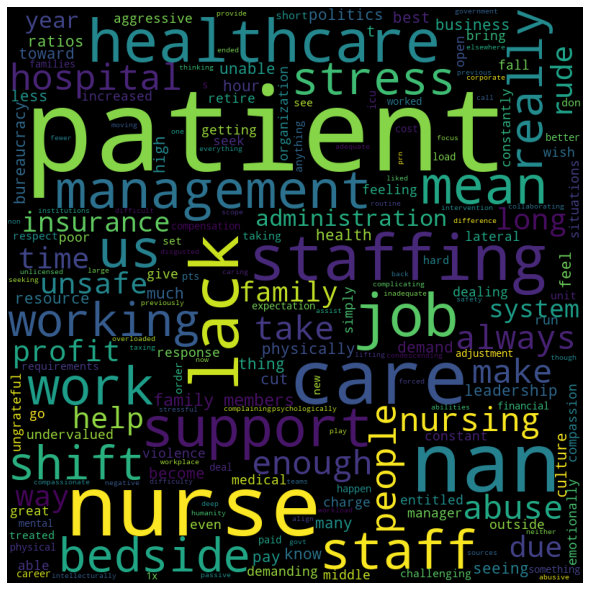

In [74]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
for val in RNLL.LeastLikeRN:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [75]:
RN.rename(columns={'What do you find most challenging about being a nurse?':'ChallengeRN'},inplace=True)

In [76]:
RNCH = RN['ChallengeRN'].dropna()
RNCH = RN[RN.ChallengeRN != 'nan']

In [77]:
import nltk
fd = nltk.FreqDist(' '.join(RNCH).split())
fd.most_common(20)

[('Unnamed:', 41),
 ('you', 34),
 ('the', 28),
 ('of', 27),
 ('in', 18),
 ('as', 18),
 ('your', 17),
 ('to', 14),
 ('a', 14),
 ('January', 12),
 ('1,', 12),
 ('What', 11),
 ('that', 9),
 ('work', 9),
 ('2019?', 8),
 ('are', 7),
 ('do', 7),
 ('following', 7),
 ('Please', 7),
 ('what', 6)]

In [78]:
from nltk.corpus import stopwords

stops = stopwords.words('english')
stops.append("")

In [79]:
filtered_words = []
for w in fd:
    w = w.lower()
    w = re.sub("[^a-zA-Z]+", "", w)
    if w not in stops:
        filtered_words.append(w)

In [80]:
filtered_words

['unnamed',
 'january',
 'work',
 'following',
 'please',
 'nurse',
 'would',
 'space',
 'currently',
 'enter',
 'nurse',
 'working',
 'type',
 'facility',
 'choose',
 'licensed',
 'provided',
 'response',
 'one',
 'select',
 'jobs',
 'rank',
 'id',
 'date',
 'address',
 'name',
 'participate',
 'asked',
 'questions',
 'hold',
 'practice',
 'list',
 'license',
 'healthcare',
 'please',
 'experiences',
 'nursing',
 'best',
 'describes',
 'common',
 'time',
 'hospital',
 'workplease',
 'since',
 'factors',
 'based',
 'influential',
 'making',
 'decision',
 'influentialnote',
 'item',
 'influence',
 'decision',
 'please',
 'na',
 'current',
 'hours',
 'statements',
 'strongly',
 'want',
 'respondent',
 'collector',
 'start',
 'end',
 'ip',
 'email',
 'first',
 'last',
 'custom',
 'data',
 'wish',
 'study',
 'clicking',
 'yes',
 'agreeing',
 'study',
 'indicate',
 'understand',
 'risks',
 'benefits',
 'participation',
 'acknowledge',
 'also',
 'agree',
 'research',
 'clear',
 'stop',
 'par

In [81]:
cleaned_fd = nltk.FreqDist(filtered_words)
cleaned_fd.most_common(20)

[('please', 3),
 ('study', 3),
 ('states', 3),
 ('nurse', 2),
 ('facility', 2),
 ('select', 2),
 ('time', 2),
 ('decision', 2),
 ('first', 2),
 ('participation', 2),
 ('agree', 2),
 ('level', 2),
 ('care', 2),
 ('traveler', 2),
 ('unnamed', 1),
 ('january', 1),
 ('work', 1),
 ('following', 1),
 ('would', 1),
 ('space', 1)]

In [82]:
def compute_freq(text, n_value=2):

    tokens = nltk.word_tokenize(text)
    ngrams = nltk.ngrams(tokens, n_value)
    ngram_fdist = nltk.FreqDist(ngrams)
    return ngram_fdist

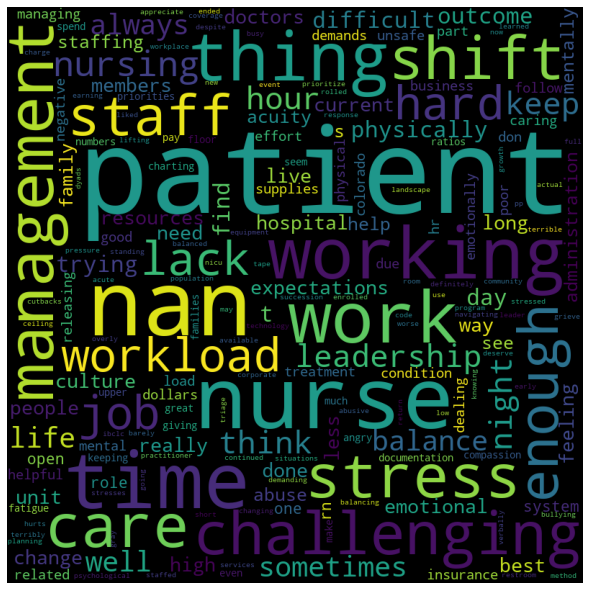

In [83]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
for val in RNCH.ChallengeRN:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [139]:
RN.rename(columns={'What do you find most rewarding about being a nurse?':'Reward'},inplace=True)

In [140]:
RNR = RN['Reward'].dropna()
RNR = RN[RN.Reward != 'nan']

In [141]:
import nltk
fd = nltk.FreqDist(' '.join(RNR).split())
fd.most_common(20)

[('Unnamed:', 41),
 ('you', 33),
 ('the', 28),
 ('of', 27),
 ('in', 18),
 ('as', 18),
 ('your', 17),
 ('to', 14),
 ('a', 13),
 ('January', 12),
 ('1,', 12),
 ('What', 10),
 ('that', 9),
 ('work', 9),
 ('2019?', 8),
 ('are', 7),
 ('following', 7),
 ('Please', 7),
 ('what', 6),
 ('do', 6)]

In [142]:
from nltk.corpus import stopwords

stops = stopwords.words('english')
stops.append("")

In [143]:
filtered_words = []
for w in fd:
    w = w.lower()
    w = re.sub("[^a-zA-Z]+", "", w)
    if w not in stops:
        filtered_words.append(w)

In [144]:
filtered_words

['unnamed',
 'january',
 'work',
 'following',
 'please',
 'would',
 'nurse',
 'space',
 'currently',
 'enter',
 'nurse',
 'working',
 'type',
 'facility',
 'choose',
 'licensed',
 'provided',
 'response',
 'one',
 'select',
 'jobs',
 'rank',
 'id',
 'date',
 'address',
 'name',
 'participate',
 'asked',
 'questions',
 'hold',
 'practice',
 'list',
 'license',
 'healthcare',
 'please',
 'experiences',
 'nursing',
 'best',
 'describes',
 'common',
 'time',
 'hospital',
 'workplease',
 'since',
 'factors',
 'based',
 'influential',
 'making',
 'decision',
 'influentialnote',
 'item',
 'influence',
 'decision',
 'please',
 'na',
 'current',
 'hours',
 'statements',
 'strongly',
 'want',
 'respondent',
 'collector',
 'start',
 'end',
 'ip',
 'email',
 'first',
 'last',
 'custom',
 'data',
 'wish',
 'study',
 'clicking',
 'yes',
 'agreeing',
 'study',
 'indicate',
 'understand',
 'risks',
 'benefits',
 'participation',
 'acknowledge',
 'also',
 'agree',
 'research',
 'clear',
 'stop',
 'par

In [145]:
cleaned_fd = nltk.FreqDist(filtered_words)
cleaned_fd.most_common(20)

[('please', 3),
 ('study', 3),
 ('states', 3),
 ('nurse', 2),
 ('facility', 2),
 ('select', 2),
 ('time', 2),
 ('decision', 2),
 ('first', 2),
 ('participation', 2),
 ('agree', 2),
 ('level', 2),
 ('care', 2),
 ('traveler', 2),
 ('unnamed', 1),
 ('january', 1),
 ('work', 1),
 ('following', 1),
 ('would', 1),
 ('space', 1)]

In [146]:
def compute_freq(text, n_value=2):

    tokens = nltk.word_tokenize(text)
    ngrams = nltk.ngrams(tokens, n_value)
    ngram_fdist = nltk.FreqDist(ngrams)
    return ngram_fdist

In [147]:
print(RNR.Reward.isnull().sum())

17


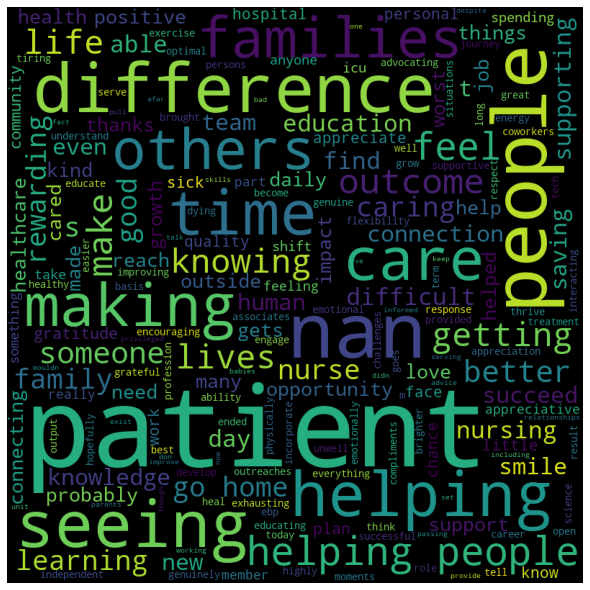

In [148]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
for val in RNR.Reward:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [149]:
RNR.Reward.drop(0)

1      Being supportive and encouraging people when t...
2      Knowing I have made a difference in many situa...
3                  Helping others in their worst moments
4                    Caring and advocating for patients 
5                                         Helping people
                             ...                        
114    When I make a difference for my patients or a ...
115    Connecting with my patients.  It feels like I ...
116    Feeling like I am a part of something bigger t...
117    Helping women bring new humans into the world ...
118    Creating an environment for healing and restor...
Name: Reward, Length: 118, dtype: object